Regressão Linear Múltipla

Estimar o Preço dos Imóveis na Cidade de Nova Iorque 

In [1]:
import pickle #salvar o modelo 
import pandas as pd #manipulação dos dados em dataframe
import seaborn as sns #biblioteca de visualização de informações estatística
import matplotlib.pyplot as plt #biblioteca de visualização de dados
import statsmodels.api as sm #biblioteca de modelagem estatística
import statsmodels.formula.api as smf #regresão linear multipla 
import numpy as np #biblioteca de operações matemáticas
import pingouin as pg #biblioteca estatística
from scipy import stats #testes estatísticos
from statstests.process import stepwise #procedimento stepwie

In [2]:
#Carregamento da base de dados
df_locacao_imoveis = pd.read_csv('../dados/teste_indicium_precificacao.csv', delimiter=',')

In [3]:
#Visualização da base de dados
df_locacao_imoveis.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
#Características das variáveis do dataset
df_locacao_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
#Alterar o formato da variável para float
df_locacao_imoveis['price'] = df_locacao_imoveis['price'].astype(float)

In [6]:
#Estatística descritiva das variáveis quantitativas
df_locacao_imoveis[['latitude','longitude','price','minimo_noites','numero_de_reviews','reviews_por_mes','calculado_host_listings_count','disponibilidade_365']].describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
#Checando valores missing
df_locacao_imoveis.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Os dados revelam que a quantidade de imóveis é maior nos bairros de Manhattan e no Brooklyn.

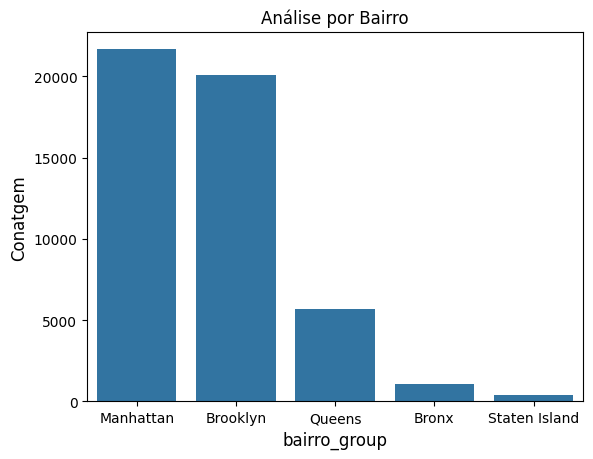

In [8]:
sns.countplot(data=df_locacao_imoveis, x="bairro_group", order=["Manhattan", "Brooklyn", "Queens", "Bronx","Staten Island"])
plt.title("Análise por Bairro")
plt.xlabel('bairro_group',fontsize=12)
plt.ylabel('Conatgem',fontsize=12)
plt.show()

 O comportamento do preço é influenciado pelas variáveis 'minimo_noites','calculado_host_listings_count' e 'disponibilidade_365'. 
 
 Na analise preliminar, a variável 'disponibilidade_365' foi a que apresentou maior correlação positiva com o preço do aluguel do imóvel.O número de noite e a disponibilidade ao longo do ano interferirem no valor do aluguel em dólar.

 Por outro lado, as variáveis 'longitude','numero_de_reviews' e 'reviews_por_mes' tem uma  correlação negativa com o preço. Contudo, isso não significa dizer que a correlação, necessariamente, é uma relação de causa e efeito.

In [9]:
variaveis_quantitativas = df_locacao_imoveis[['latitude','longitude','price','minimo_noites','numero_de_reviews','reviews_por_mes','calculado_host_listings_count','disponibilidade_365']]

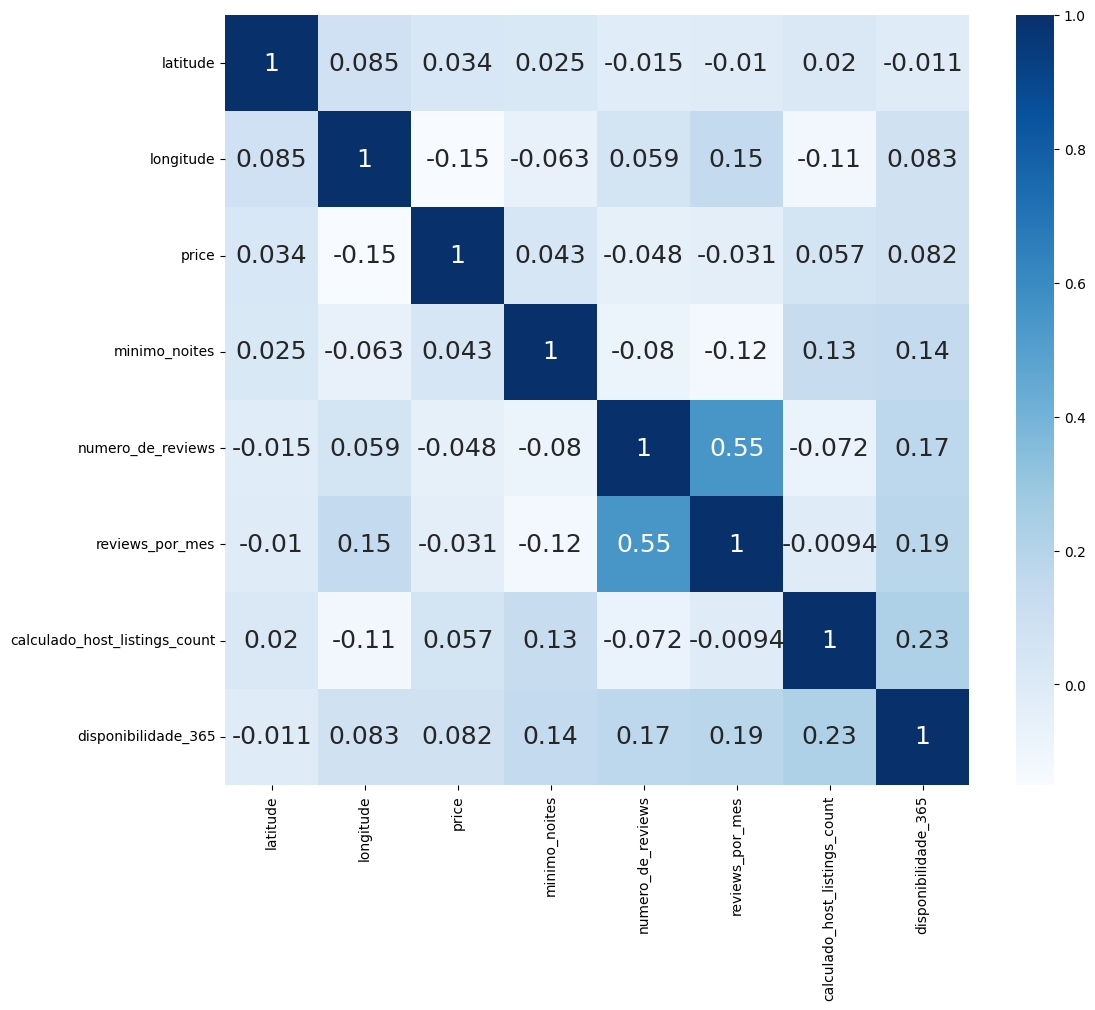

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(variaveis_quantitativas.corr(), annot=True, cmap = 'Blues',
            annot_kws={'size':18})
plt.show()

As variáveis quantitativas 'latitude' e 'longitude' não apresentou significacia estatistica na correlação com o preço. 

In [11]:
pg.rcorr(variaveis_quantitativas, method='pearson',
         upper='pval', decimals=4,
         pval_stars={0.01: '***',
                     0.05: '**',
                     0.10: '*'})

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
latitude,-,***,***,***,***,**,***,**
longitude,0.0848,-,***,***,***,***,***,***
price,0.0339,-0.15,-,***,***,***,***,***
minimo_noites,0.0249,-0.0627,0.0428,-,***,***,***,***
numero_de_reviews,-0.0154,0.0591,-0.048,-0.0801,-,***,***,***
reviews_por_mes,-0.0102,0.1459,-0.0306,-0.1217,0.5499,-,*,***
calculado_host_listings_count,0.0195,-0.1147,0.0575,0.128,-0.0724,-0.0094,-,***
disponibilidade_365,-0.0109,0.0828,0.0818,0.1443,0.172,0.1858,0.2257,-


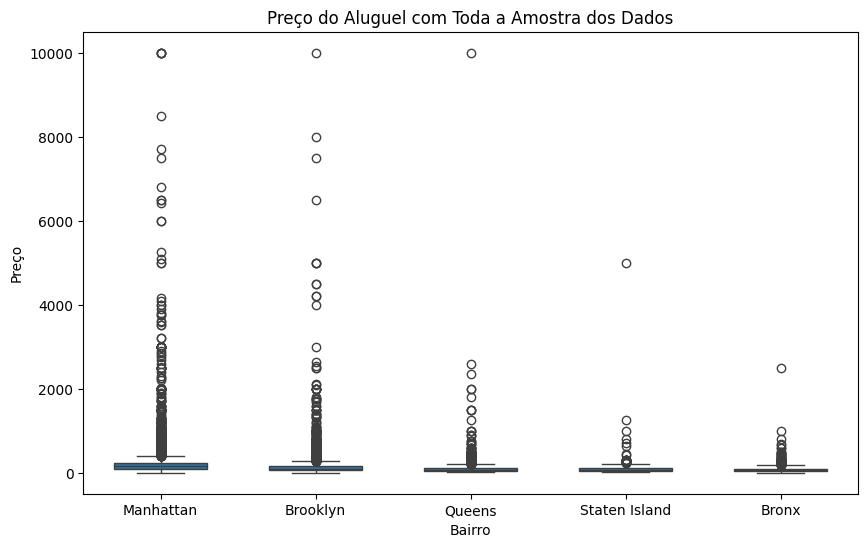

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bairro_group', y='price', data=df_locacao_imoveis, width = 0.6)
plt.title('Preço do Aluguel com Toda a Amostra dos Dados')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.show()

Quebra o problema por critérios 

In [13]:
#Filtros para análise dos dados 
def aplicar_filtro_global(df,global_filter):
    """"
    Aplicar filtros globais e especificos no dataframe.
    Args:
        df(pd.DataFrame): DataFrame a ser filtrado
        global_filter (str): Condição global aplicada ao conjunto de dados

    Returns:
        pd.DataFrame filtrado.

    """
    #Aplicar filtro global
    return df.query(global_filter)

def aplicar_filtros_especificos(df,specificos_filtros):
    """"
    Aplicar filtros especificos no dataframa.
    Args:
        df(pd.DataFrame): DataFrame a ser filtrado
        specific_filters (list): Lista de condições especifica aplicada ao subconjuto

    Returns:
        pd.DataFrame filtrado.

    """
    for condition in specificos_filtros:
        df = df.query(condition)
    return df 


global_filtro = "price >= 1000"

specificos_filtros = [
    "bairro_group == 'Manhattan'",
    "bairro == 'Midtown'",
     "minimo_noites== 1"
     ]


Selecionamos os preços dos alugueis de imóveis maior ou igual 1000 dólares


In [14]:
preco_maior_ou_igual_1000 = aplicar_filtro_global(df_locacao_imoveis, global_filtro)

Morar em New Yourk é mais caro como a média e a mediana do preço do aluguel aumentando com destaca para as áreas de Manhattan e o Brooklyn.

O preço do aluguel é maior nos bairros de Manhattan e Brooklyn na faixa de 4000 a 10000 dólares. Exemplo, em Boerum Hill, Brooklyn, o valor é 1000 dólares Entire home/apt. Em Chinatown, Manhattan o valor é 1000 dólares Entire home/apt.

O mercado imobiliário tem seu valor mais alto em Manhattan, outro beneficio é a sua proximidade com o Upper West Side, aonde o valor pode chegar na faixa entre 6000 a 10000 dólares Entire home/apt.

As oportunidades de investimento em bairros como Hamilton Heighs. Os investidores teria  oportunidades atratativas no centro de Manhattan.

As localidades vizinhas como Wood/Sunnyde in Queens, incluindo SteinWay, Jackson Heights,Maspeth e Elmhurst.
Na verdade, Manhattan e o Brookyn alcaçarm maiores retornos em relação ao preço do apartamento por metro quadrado entre os anos de 2013 a 2023.

 O padrão dos alto valores estão nos bairros de Manhattan e Brooklyn.
 No gráfico boxplot identificamos alguns valores de outliers nos eixos y.

Upper West Side,Manhattan 10000 dólares Entire home/apt

Clinton Hill,Brooklyn, 8000 dólares Entire home/apt

East Flatbush,Brooklyn 7500 dólares Private room

East Flatbush,Brooklyn, 7500 dólares Entire home/apt

Kevin,Manhattan 6800 dólares Entire home/apt

Tribeca,Manhattan 6500 dólares Entire home/apt

Upper West Side,Manhattan 6000 dólares Entire home/apt

Greenwich Village,Manhattan, 6000 dólares Entire home/apt

Jessica,Manhattan 5000 dólares Entire home/apt

Harlem,Manhattan 5000 dólares Entire home/apt

Bedford-Stuyvesant,Brooklyn 5000 dólares Entire home/apt

Jessica,Manhattan 4500 dólares Entire home/apt

Todd,Manhattan 4000 dólares Entire home/apt


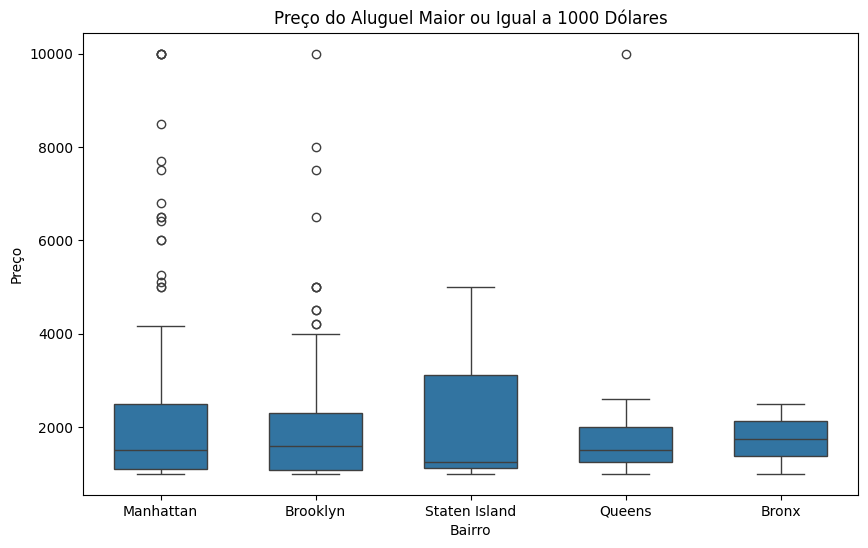

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bairro_group', y='price', data=preco_maior_ou_igual_1000, width = 0.6)
plt.title('Preço do Aluguel Maior ou Igual a 1000 Dólares')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.show()

Selecionando os dados da região Midtown Manhattan pelo critério do  bairro e o número mínimo de noite de reservas dos clientes

In [16]:
filtro_bairro_manhattan = aplicar_filtros_especificos(df_locacao_imoveis, specificos_filtros)

In [17]:
df_filtro_bairro_manhattan = pd.DataFrame(filtro_bairro_manhattan)

In [18]:
#O aluguel  do apartamento com id igual 2595 é 225 dólares.Esse é o preço sugerido, respondendo a pergunta 4 do desafio.
df_filtro_bairro_manhattan.head(n=1)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355


 Notamos que a mediana do preço do imóvel(Entire home/apt) para reserva de uma noite é de 185 dólares na área de  Midtown, Manhattan. 

In [19]:
df_filtro_bairro_manhattan['price'].describe()

count     369.000000
mean      262.140921
std       233.238627
min        50.000000
25%       120.000000
50%       185.000000
75%       325.000000
max      1999.000000
Name: price, dtype: float64

Preço do Aluguel de uma Noite de Reserva na Região Midtown Manhattan

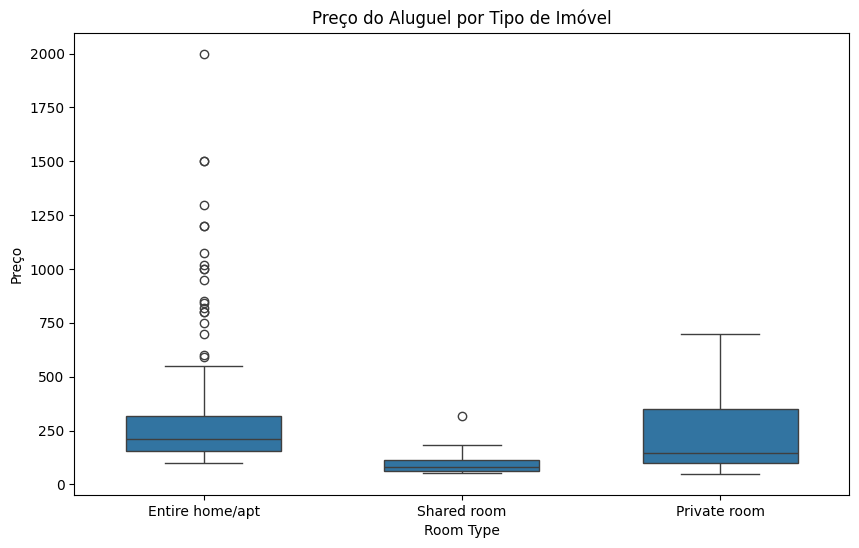

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df_filtro_bairro_manhattan, width = 0.6)
plt.title('Preço do Aluguel por Tipo de Imóvel')
plt.xlabel('Room Type')
plt.ylabel('Preço')
plt.show()

Transformação dos dados para aplicar a técnica de regressão 

In [21]:
df_locacao_imoveis['room_type'] = df_locacao_imoveis['room_type'].map({

    'Entire home/apt' : 'home_apt',
    'Private room' : 'private_room',
    'Shared room' : 'shared_room'
})

In [22]:
df_locacao_imoveis['bairro_group'] = df_locacao_imoveis['bairro_group'].map({
    'Manhattan': 'Manhattan',
    'Brooklyn': 'Brooklyn',
    'Queens': 'Queens',
    'Staten Island' : 'Staten_Island',
    'Bronx': 'Bronx'
})

Variáveis dummy em modelos de regressão

Transformação das variáveis qualitativas em dummy que serão incluidas nos modelos de regressão estimados.
Como não podemos atribuir valores nas variáveis qualitativas devido ao erro de poderação arbitrária.
Consequentemente, recorremos a essa transformação que é mais edequada para verificar o comportamento das variáveis bairro_group e room_type no modelo.

In [23]:
df_locacao_imoveis_dummy = pd.get_dummies(df_locacao_imoveis, columns=['bairro_group','room_type'])

In [24]:
#Removendo algumas colunas 
df_locacao_imoveis_dummy_drop = df_locacao_imoveis_dummy.drop(columns=['id','nome','host_id','host_name','bairro','latitude','longitude','ultima_review','bairro_group_Staten_Island','room_type_shared_room'])

In [25]:
#Inserindo zero nos valores missing e alterando o formato da variável reviews_por_mes para inteiro
df_locacao_imoveis_dummy_drop['reviews_por_mes'] = df_locacao_imoveis_dummy_drop['reviews_por_mes'].fillna(0).astype(int)

Estimando o Modelo Regressão Linear Multipla 

A vantagem de usar essa técnica é que pode ser aplicado em várias áreas,quando a variável preditiva  do problema é quantitativa. 
A desvatagem é em relação alguns pressuposto como os resíduos do modelo  têm que apresentar a distribuição normal.

A violação desse pressuposto pode ser minimizado pelo uso de grandes amostras de dados. 
Não existe correlação elevadas entre as variáveis explicativas. Os residuos não tem correlação com qualquer variável explicativa.O problema de multicolinearidade.

Primeiro modelo estimado

In [26]:
formula01 = "price ~ minimo_noites + numero_de_reviews + reviews_por_mes + calculado_host_listings_count + disponibilidade_365 + bairro_group_Bronx + bairro_group_Brooklyn + bairro_group_Manhattan + bairro_group_Queens + room_type_home_apt + room_type_private_room"


In [27]:
modelo01 = smf.ols(formula01, data = df_locacao_imoveis_dummy_drop).fit()

Visualizando os resultados do modelo podemos visualizar que o intercepto não foi estatisticamente significante no nível 5%.

Além disso, as variáveis explicativas bairro grupo Bronx, bairro group Queens e o minimo noites também não tem significancia estatistica. 
Portanto, essas variáveis serão removidas e o modelo será reestimado.

In [28]:
print(modelo01.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     454.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:19:18   Log-Likelihood:            -3.3500e+05
No. Observations:               48894   AIC:                         6.700e+05
Df Residuals:                   48882   BIC:                         6.701e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Segundo modelo estimado

In [29]:
formula02 = "price ~ numero_de_reviews + reviews_por_mes + calculado_host_listings_count + disponibilidade_365 + bairro_group_Brooklyn + bairro_group_Manhattan + room_type_home_apt + room_type_private_room"


In [30]:
modelo02 = smf.ols(formula02, data = df_locacao_imoveis_dummy_drop).fit()

Os resultados demostram que o intercepto não é estatisticamente diferente de zero o p-valor é alto 0.326.
Porém, todas as variáveis explicaticcas do modelo foram estatisticamente significante no nível de 5% ou 1%.
Comparando o coeficiente de ajuste do modelo01 (R² ajustado) e o modelo02 o valor é igual.Vamos estimar um terceiro modelo.

In [31]:
print(modelo02.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:19:18   Log-Likelihood:            -3.3500e+05
No. Observations:               48894   AIC:                         6.700e+05
Df Residuals:                   48885   BIC:                         6.701e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Terceiro modelo estimado

Observação, retiramos a variável bairro group Brooklyn.

In [32]:
formula03 = "price ~ numero_de_reviews + reviews_por_mes + calculado_host_listings_count + disponibilidade_365 + bairro_group_Manhattan + room_type_home_apt + room_type_private_room"


In [33]:
modelo03 = smf.ols(formula03, data = df_locacao_imoveis_dummy_drop).fit()

No terceiro modelo podemos verificar que todos os parâmetros são estatisticamente diferentes de zero o valor-P < 0,05.
Adcionalmente, os teste t de cada parâmetro revelam que todos eles são estatisticamente diferente de zero, uma vez que cada valor-P < 0,05. Dessa forma, nenhuma variável precisa ser excluída do modelo.Embora, possa existir o problema de multicolinearidade(alta correlação entre as variáveis explicativas), mas, isso não afeta a capacidade preditiva do modelo.
O coeficiente de ajuste R² ajustado é 0,092, ou seja, 9,2% do comportamento da variação do preço do aluguel de imóvel é explicado  pelas variáveis bairro_group_Manhattan,room_type_home_apt,room_type_private_room,numero_de_reviews,calculado_host_listings_count e disponibilidade_365. 

In [34]:
print(modelo03.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     707.3
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:19:18   Log-Likelihood:            -3.3502e+05
No. Observations:               48894   AIC:                         6.701e+05
Df Residuals:                   48886   BIC:                         6.701e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Estimação do quarto modelo por meio da seleção automática das variáveis pelo procedimento Stepwise

In [35]:
stepwise_modelo04 = stepwise(modelo01, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 price ~ Q('bairro_group_Bronx[T.True]') + Q('bairro_group_Brooklyn[T.True]') + Q('bairro_group_Manhattan[T.True]') + Q('bairro_group_Queens[T.True]') + Q('room_type_home_apt[T.True]') + Q('room_type_private_room[T.True]') + Q('minimo_noites') + Q('numero_de_reviews') + Q('reviews_por_mes') + Q('calculado_host_listings_count') + Q('disponibilidade_365')

 Discarding atribute "Q('bairro_group_Queens[T.True]')" with p-value equal to 0.6082376014117972 

Estimating model...: 
 price ~ Q('bairro_group_Bronx[T.True]') + Q('bairro_group_Brooklyn[T.True]') + Q('bairro_group_Manhattan[T.True]') + Q('room_type_home_apt[T.True]') + Q('room_type_private_room[T.True]') + Q('minimo_noites') + Q('numero_de_reviews') + Q('reviews_por_mes') + Q('calculado_host_listings_count') + Q('disponibilidade_365')

 Discarding atribute "Q('minimo_noites')" with p-value equal to 0.5887228689605903 

Estimating model...: 
 price ~ Q('bairro_group_Bronx[T.True]') + Q('ba

Não usamos o quarto modelo o intecepto não foi estatisticamente significante. 

In [36]:
print(stepwise_modelo04.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:19:19   Log-Likelihood:            -3.3500e+05
No. Observations:               48894   AIC:                         6.700e+05
Df Residuals:                   48885   BIC:                         6.701e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

O termo quantil é sinonimo de percentil,ou seja, a mediana é o melhor exemplo de quantil.

Os modelos de regressão quantilica que se aproxima mais dos dados uma vez que o mesmo estima os percentis da variável preço.
A técnica de regressão a mediana não é muito impactada pela presença de outliers, ao contrário da técnica de regressão linear a média.

In [37]:
#salvar o modelo
#pickle.dump(modelo03, open("modelo03.pkl", "wb"))

In [38]:
# Carregar modelo do arquivo
#loaded_model = pickle.load(open("modelo03.pkl", "rb"))